<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220809_K_means01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-means clustering을 활용한 데이터 분류 실습**
---
> 성인 남녀의 키/몸무게를 바탕으로 k개의 군집으로 분류하기

#### **라이브러리 import**


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

####**데이터 로드 및 확인**

In [24]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [42]:
filename = '/gdrive/My Drive/k-means.csv'
df = pd.read_csv(filename)
df_km = df.loc[:501]              # 데이터 일부만 추출
print(df_km.head())
print(df_km.shape)

   height  weight
0  1736.0    72.1
1  1833.0   106.2
2  1744.0    69.1
3  1751.0    68.4
4  1851.0    81.9
(502, 2)


#### **데이터 시각화하여 확인하기**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


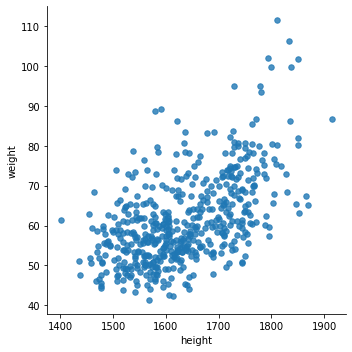

In [43]:
sns.lmplot('height', 'weight', data = df_km,
           fit_reg=False, scatter_kws={"s":30})
# fit_reg 회귀 직선 표시 여부 statter_kwf 점의 사이즈

#### **클러스터링 수행 및 시각화**

In [44]:
data_points = df_km.values
kmeans = KMeans(n_clusters=3).fit(data_points)    # 3 개의 군집

kmeans.labels_[:10]                               # cluster 레이블 10개                       

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [45]:
df_km['cluster'] = kmeans.labels_                 # 기존 프레임에 붙여넣기
df_km.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,height,weight,cluster
0,1736.0,72.1,1
1,1833.0,106.2,1
2,1744.0,69.1,1
3,1751.0,68.4,1
4,1851.0,81.9,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


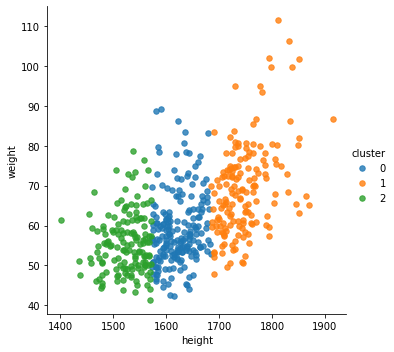

In [46]:
sns.lmplot('height', 'weight', data=df_km, fit_reg = False, scatter_kws={"s":30}, hue='cluster')